In [1]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import OneHotEncoder

try:
    from Layer import Layer, ReLU, Sigmoid
except ModuleNotFoundError:
    from src.Layer import Layer, ReLU, Sigmoid

try:
    from Perceptron import MLP
except:
    from src.Perceptron import MLP

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(20240521)

ModuleNotFoundError: No module named 'Layer'

In [59]:
digits = load_digits()

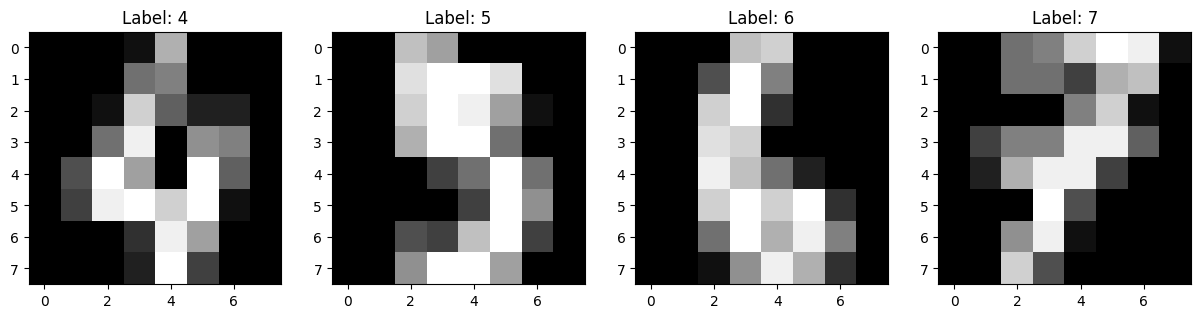

In [60]:
num_images = 4
fig,axes = plt.subplots(1,num_images,figsize=(15,10))
for image,label,ax in zip(digits.data[num_images:],digits.target[num_images:],axes):
    ax.imshow(image.reshape(8,8),cmap='gray')
    ax.set_title(f"Label: {label}")

In [61]:
digits.target = digits.target.reshape(-1, 1)

enc = OneHotEncoder(max_categories=10)
enc.fit(digits.target.reshape(-1, 1))
digits.target = enc.transform(digits.target).toarray()

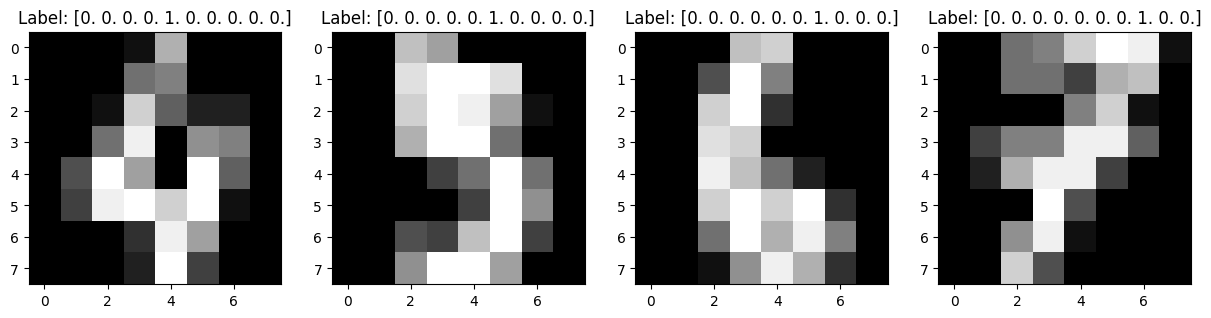

In [62]:
num_images = 4
fig,axes = plt.subplots(1,num_images,figsize=(15,10))
for image,label,ax in zip(digits.data[num_images:],digits.target[num_images:],axes):
    ax.imshow(image.reshape(8,8),cmap='gray')
    ax.set_title(f"Label: {label}")

In [63]:
split_data = np.split(digits.data, [int(0.7 * len(digits.data))])
split_labels = np.split(digits.target, [int(0.7 * len(digits.data))])

train_data = split_data[0]
test_data = split_data[1]
train_labels = split_labels[0]
test_labels = split_labels[1]

In [64]:
split_data[0].shape

(1257, 64)

In [65]:
shuffle = np.random.permutation(len(train_data))

train_data = train_data[shuffle]
train_labels = train_labels[shuffle]

shuffle = np.random.permutation(len(test_data))

test_data = test_data[shuffle]
test_labels = test_labels[shuffle]

In [66]:
print(f"The shape of the training set is: {train_data.shape[0]} x {train_data.shape[1]}")
print(f"The shape of the test set is: {test_data.shape[0]} x {test_data.shape[1]}")

The shape of the training set is: 1257 x 64
The shape of the test set is: 540 x 64


In [67]:
train_data = (train_data - np.min(train_data)) / (np.max(train_data) - np.min(train_data))
test_data = (test_data - np.min(test_data)) / (np.max(test_data) - np.min(test_data))

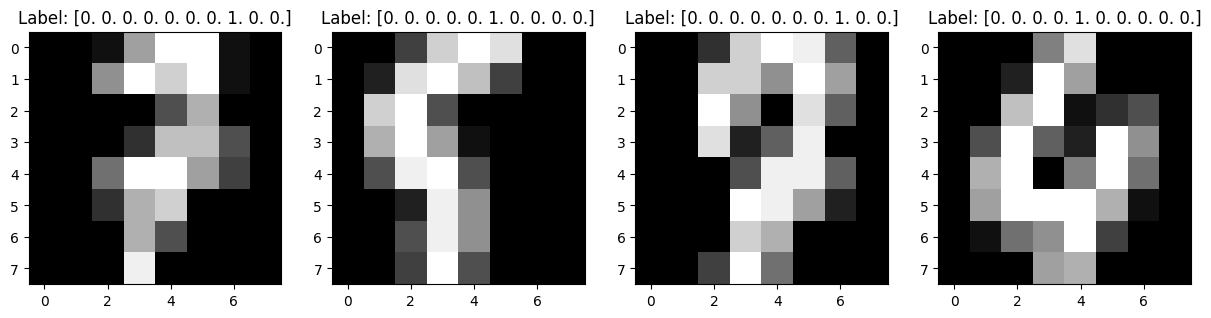

In [68]:
num_images = 4
fig,axes = plt.subplots(1,num_images,figsize=(15,10))
for image,label,ax in zip(test_data[:num_images],test_labels[:num_images],axes):
    ax.imshow(image.reshape(8,8),cmap='gray')
    ax.set_title(f"Label: {label}")

In [69]:

learning_rate = 0.0005
batch_size = 1

InputLayer = Layer(
    lr=learning_rate,
    inputSize=64,
    outputSize=64,
    actFunction=ReLU(),
    batch_size=batch_size
    )
HiddenLayer1 = Layer(
    lr=learning_rate,
    inputSize=64,
    outputSize=24,
    actFunction=ReLU(),
    batch_size=batch_size
    )
HiddenLayer2 = Layer(
    lr=learning_rate,
    inputSize=24,
    outputSize=16,
    actFunction=ReLU(),
    batch_size=batch_size
    )
OutputLayer = Layer(
    lr=learning_rate,
    inputSize=16,
    outputSize=10,
    actFunction=Sigmoid(),
    batch_size=batch_size
    )

layers = [
    InputLayer,
    HiddenLayer1,
    HiddenLayer2,
    OutputLayer
]

model = MLP(layers=layers)
fitreturn = model.fit(
    x_train=train_data,
    y_train=train_labels,
    epochs=30,
    learning_rate=learning_rate,
    verbose=0
    )

In [70]:
fitreturn[0] # Loss

[0.008365066347195848,
 0.004987602715516591,
 0.003935226842755174,
 0.0033743030214675456,
 0.0030225574631811882,
 0.0027302835900286193,
 0.002404862017316842,
 0.0021844081132469393,
 0.0018342565728917157,
 0.0018177563181196385,
 0.0016061222895845174,
 0.0015287726159430137,
 0.0015001705895733245,
 0.0013917233878846637,
 0.0013323202247271838,
 0.001274312618244867,
 0.0012446612981123525,
 0.0012288685386801492,
 0.001097406956282868,
 0.0011946590213516778,
 0.0010267734182138454,
 0.0010962379183084596,
 0.0010626647195223638,
 0.0011290822004535665,
 0.001005202411226975,
 0.0010229751309876352,
 0.00094819833848276,
 0.0009629025749741815,
 0.0009282153936321056,
 0.0008842784964221045]

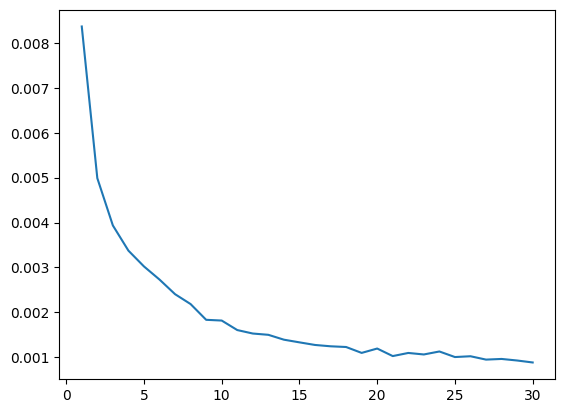

In [71]:
xdata = range(1, len(fitreturn[0]) + 1)
ydata = fitreturn[0]
plt.figure()
plt.plot(xdata, ydata)


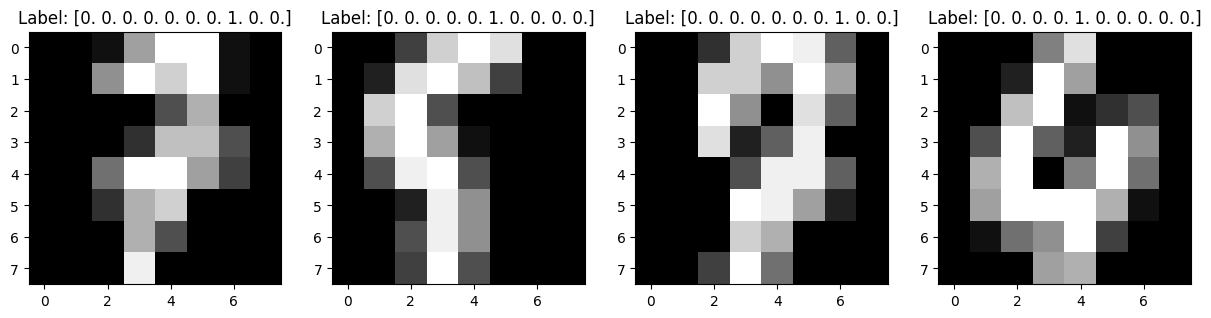

In [72]:
num_images = 4
fig,axes = plt.subplots(1,num_images,figsize=(15,10))
for image,label,ax in zip(test_data[:num_images],test_labels[:num_images],axes):
    ax.imshow(image.reshape(8,8),cmap='gray')
    ax.set_title(f"Label: {label}")

<Figure size 640x480 with 0 Axes>

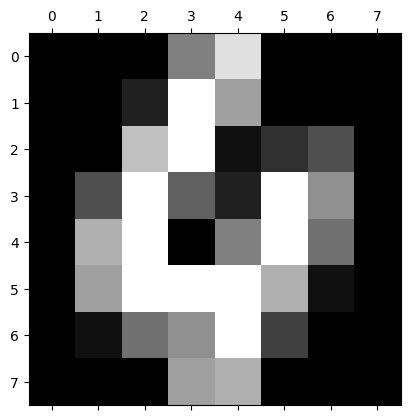

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4


In [73]:
predictions = []
for i in range(len(test_data)):
  output = model(np.atleast_2d(test_data[i]))
  prediction = np.argmax(output)
  predictions.append(prediction)

plt.gray()
plt.matshow(test_data[3].reshape(8, 8))
plt.show()

print(test_labels[3], predictions[3])

In [74]:
predictions = []
for i in range(len(test_data)):
  output = model(np.atleast_2d(test_data[i]))
  prediction = np.argmax(output)
  predictions.append(prediction)

y_true = np.argmax(np.array(test_labels), axis=1)

accuracy_score(y_true, predictions)

0.8148148148148148

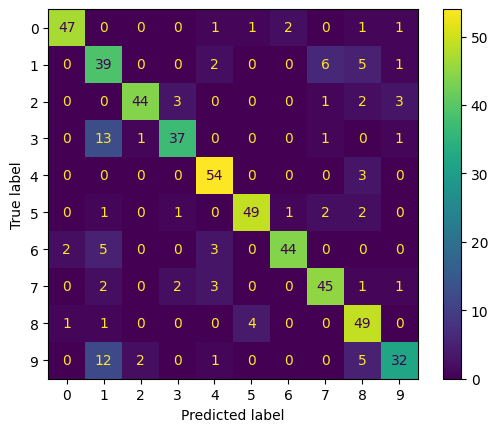

In [75]:
classes = range(0, 10)

cm = confusion_matrix(y_true, predictions, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [76]:
f1_score(y_true, predictions, average='micro')

0.8148148148148148